In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


2023-07-18 10:09:49.155140: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-18 10:09:49.200732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 10:09:49.871875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
parameterization = '4'
data = gl.parameterize_data(parameterization)
model_statistics = pd.read_pickle('zults/model_statistics_' + parameterization + '.pkl')

architecture_weights, residual_model = gl.compute_model_weights(
    model_statistics, parameterization, pth = '/data/fast1/glacierml/data'
)

architecture_weights
aw = architecture_weights

In [ ]:
aw

In [ ]:
aw['IQR_1'] / 1.34896

In [ ]:
plt.scatter(
    aw.index,
    aw.aw_1,
    label = 'Interpretation 1'
)
plt.scatter(
    aw.index,
    aw.aw_2,
    label = 'Interpretation 2'
)
plt.scatter(
    aw.index,
    aw.aw_3,
    label = 'Interpretation 3'
)
plt.ylabel('Architecture Weight')
plt.xlabel('Architecture Index')
plt.legend()


In [ ]:

# plt.plot(
#     aw.index, 
#     1 / (np.cumsum(1/ architecture_weights['architecture weight']))
# )
# plt.title('Cumulative Thickness Variance' +  
#           r' $\hat{\sigma}_{l}^{2} =\frac{{1}}{{\sum_{i}1 / \sigma^{2}_{il}}}$'
#          )
# plt.xlabel('Architecture Index (i)')
# plt.ylabel('Composite Variance $(\hat{\sigma}_{l}^{2})$')
# plt.grid(visible = None)

# Model Weighting

In [8]:
parameterization = '4'
est = pd.read_pickle('model_weights/param' + parameterization + '_weighting_data.pkl')

In [9]:
est

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,layer architecture,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,pr_9,pr_10,pr_11,pr_12,pr_13,pr_14,pr_15,pr_16,pr_17,pr_18,pr_19,pr_20,pr_21,pr_22,pr_23,pr_24,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,r_11,r_12,r_13,r_14,r_15,r_16,r_17,r_18,r_19,r_20,r_21,r_22,r_23,r_24
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,3-2,282.635742,223.752106,159.993134,89.245750,229.779449,48.996700,230.333725,287.762207,223.083298,269.766327,48.996700,243.565048,48.996700,221.529037,96.186508,48.115826,235.491928,204.151291,48.996700,273.782776,285.346802,210.332809,266.681152,196.154892,236.091248,0.204255,-0.046809,-0.319149,-0.621277,-0.021277,-0.791489,-0.021277,0.225532,-0.051064,0.148936,-0.791489,0.038298,-0.791489,-0.055319,-0.591489,-0.795745,0.000000,-0.131915,-0.791489,0.165957,0.212766,-0.106383,0.136170,-0.165957,0.004255,48.0,-11.0,-75.0,-146.0,-5.0,-186.0,-5.0,53.0,-12.0,35.0,-186.0,9.0,-186.0,-13.0,-139.0,-187.0,0.0,-31.0,-186.0,39.0,50.0,-25.0,32.0,-39.0,1.0
1,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,4-2,167.041489,218.813690,213.220764,180.237213,164.113312,48.996700,48.996700,48.996700,232.456039,240.190353,48.312271,180.177689,235.855209,48.996700,48.996700,279.453339,211.052475,154.971527,227.572937,229.531464,48.996700,165.013947,48.996700,159.171677,48.996700,-0.289362,-0.068085,-0.093617,-0.234043,-0.302128,-0.791489,-0.791489,-0.791489,-0.012766,0.021277,-0.795745,-0.234043,0.004255,-0.791489,-0.791489,0.187234,-0.102128,-0.340426,-0.029787,-0.021277,-0.791489,-0.297872,-0.791489,-0.323404,-0.791489,-68.0,-16.0,-22.0,-55.0,-71.0,-186.0,-186.0,-186.0,-3.0,5.0,-187.0,-55.0,1.0,-186.0,-186.0,44.0,-24.0,-80.0,-7.0,-5.0,-186.0,-70.0,-186.0,-76.0,-186.0
2,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,5-2,45.414387,48.996700,135.327148,48.996700,167.195496,211.643524,176.937546,212.989563,163.294067,271.626343,249.546082,213.729202,218.673264,116.630684,175.335922,193.484909,218.634964,253.487915,225.921173,183.057709,264.855774,185.527298,261.251312,199.235229,225.483292,-0.808511,-0.791489,-0.425532,-0.791489,-0.289362,-0.097872,-0.246809,-0.093617,-0.306383,0.157447,0.063830,-0.089362,-0.068085,-0.502128,-0.255319,-0.178723,-0.068085,0.076596,-0.038298,-0.221277,0.127660,-0.208511,0.110638,-0.153191,-0.042553,-190.0,-186.0,-100.0,-186.0,-68.0,-23.0,-58.0,-22.0,-72.0,37.0,15.0,-21.0,-16.0,-118.0,-60.0,-42.0,-16.0,18.0,-9.0,-52.0,30.0,-49.0,26.0,-36.0,-10.0
3,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,6-2,214.698151,48.996700,48.996700,147.995346,261.053040,228.311920,202.999542,214.255402,175.119507,253.784897,48.996700,265.045624,158.114578,228.547623,193.173431,212.521988,145.518799,228.308777,223.838715,231.608429,184.438110,48.996700,224.585968,198.588287,188.410339,-0.085106,-0.791489,-0.791489,-0.370213,0.110638,-0.029787,-0.136170,-0.089362,-0.255319,0.080851,-0.791489,0.127660,-0.327660,-0.025532,-0.178723,-0.093617,-0.378723,-0.029787,-0.046809,-0.012766,-0.217021,-0.791489,-0.042553,-0.153191,-0.200000,-20.0,-186.0,-186.0,-87.0,26.0,-7.0,-32.0,-21.0,-60.0,19.0,-186.0,30.0,-77.0,-6.0,-42.0,-22.0,-89.0,-7.0,-11.0,-3.0,-51.0,-186.0,-10.0,-36.0,-47.0
4,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,7-2,222.285172,48.996700,191.651505,292.962311,277.264160,244.311783,183.275726,198.908310,252.453354,218.626541,211.055008,48.996700,48.996700,187.771835,227.990051,48.996700,48.972408,125.421562,244.986237,233.510101,48.996700,48.934727,224.674820,193.607285,213.092545,-0.055319,-0.791489,-0.182979,0.246809,0.178723,0.038298,-0.221277,-0.153191,0.072340,-0.068085,-0.102128,-0.791489,-0.791489,-0.200000,-0.029787,-0.791489,-0.791489,-0.468085,0.042553,-0.004255,-0.791489,-0.791489,-0.042553,-0.174468,-0.093617,-13.0,-

In [10]:
model_list = [
     '0', '1', '2', '3', '4', '5', '6', '7', '8',
     '9', '10', '11', '12', '13', '14', '15', '16',
     '17', '18', '19', '20', '21', '22', '23', '24',
]
pool_list = [
     'pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8',
     'pr_9', 'pr_10', 'pr_11', 'pr_12', 'pr_13', 'pr_14', 'pr_15', 'pr_16',
     'pr_17', 'pr_18', 'pr_19', 'pr_20', 'pr_21', 'pr_22', 'pr_23', 'pr_24',
]
res_list = [
     'r_0', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'r_7', 'r_8',
     'r_9', 'r_10', 'r_11', 'r_12', 'r_13', 'r_14', 'r_15', 'r_16',
     'r_17', 'r_18', 'r_19', 'r_20', 'r_21', 'r_22', 'r_23', 'r_24',
]
weight_list = [
     'w_0', 'w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 'w_7', 'w_8',
     'w_9', 'w_10', 'w_11', 'w_12', 'w_13', 'w_14', 'w_15', 'w_16',
     'w_17', 'w_18', 'w_19', 'w_20', 'w_21', 'w_22', 'w_23', 'w_24',
]

In [11]:
est[model_list] = np.round(est[model_list], 0)
est[pool_list] = np.round(est[pool_list], 2)

In [12]:
est

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,layer architecture,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,pr_9,pr_10,pr_11,pr_12,pr_13,pr_14,pr_15,pr_16,pr_17,pr_18,pr_19,pr_20,pr_21,pr_22,pr_23,pr_24,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,r_11,r_12,r_13,r_14,r_15,r_16,r_17,r_18,r_19,r_20,r_21,r_22,r_23,r_24
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,3-2,283.0,224.0,160.0,89.0,230.0,49.0,230.0,288.0,223.0,270.0,49.0,244.0,49.0,222.0,96.0,48.0,235.0,204.0,49.0,274.0,285.0,210.0,267.0,196.0,236.0,0.20,-0.05,-0.32,-0.62,-0.02,-0.79,-0.02,0.23,-0.05,0.15,-0.79,0.04,-0.79,-0.06,-0.59,-0.80,0.00,-0.13,-0.79,0.17,0.21,-0.11,0.14,-0.17,0.00,48.0,-11.0,-75.0,-146.0,-5.0,-186.0,-5.0,53.0,-12.0,35.0,-186.0,9.0,-186.0,-13.0,-139.0,-187.0,0.0,-31.0,-186.0,39.0,50.0,-25.0,32.0,-39.0,1.0
1,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,4-2,167.0,219.0,213.0,180.0,164.0,49.0,49.0,49.0,232.0,240.0,48.0,180.0,236.0,49.0,49.0,279.0,211.0,155.0,228.0,230.0,49.0,165.0,49.0,159.0,49.0,-0.29,-0.07,-0.09,-0.23,-0.30,-0.79,-0.79,-0.79,-0.01,0.02,-0.80,-0.23,0.00,-0.79,-0.79,0.19,-0.10,-0.34,-0.03,-0.02,-0.79,-0.30,-0.79,-0.32,-0.79,-68.0,-16.0,-22.0,-55.0,-71.0,-186.0,-186.0,-186.0,-3.0,5.0,-187.0,-55.0,1.0,-186.0,-186.0,44.0,-24.0,-80.0,-7.0,-5.0,-186.0,-70.0,-186.0,-76.0,-186.0
2,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,5-2,45.0,49.0,135.0,49.0,167.0,212.0,177.0,213.0,163.0,272.0,250.0,214.0,219.0,117.0,175.0,193.0,219.0,253.0,226.0,183.0,265.0,186.0,261.0,199.0,225.0,-0.81,-0.79,-0.43,-0.79,-0.29,-0.10,-0.25,-0.09,-0.31,0.16,0.06,-0.09,-0.07,-0.50,-0.26,-0.18,-0.07,0.08,-0.04,-0.22,0.13,-0.21,0.11,-0.15,-0.04,-190.0,-186.0,-100.0,-186.0,-68.0,-23.0,-58.0,-22.0,-72.0,37.0,15.0,-21.0,-16.0,-118.0,-60.0,-42.0,-16.0,18.0,-9.0,-52.0,30.0,-49.0,26.0,-36.0,-10.0
3,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,6-2,215.0,49.0,49.0,148.0,261.0,228.0,203.0,214.0,175.0,254.0,49.0,265.0,158.0,229.0,193.0,213.0,146.0,228.0,224.0,232.0,184.0,49.0,225.0,199.0,188.0,-0.09,-0.79,-0.79,-0.37,0.11,-0.03,-0.14,-0.09,-0.26,0.08,-0.79,0.13,-0.33,-0.03,-0.18,-0.09,-0.38,-0.03,-0.05,-0.01,-0.22,-0.79,-0.04,-0.15,-0.20,-20.0,-186.0,-186.0,-87.0,26.0,-7.0,-32.0,-21.0,-60.0,19.0,-186.0,30.0,-77.0,-6.0,-42.0,-22.0,-89.0,-7.0,-11.0,-3.0,-51.0,-186.0,-10.0,-36.0,-47.0
4,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,7-2,222.0,49.0,192.0,293.0,277.0,244.0,183.0,199.0,252.0,219.0,211.0,49.0,49.0,188.0,228.0,49.0,49.0,125.0,245.0,234.0,49.0,49.0,225.0,194.0,213.0,-0.06,-0.79,-0.18,0.25,0.18,0.04,-0.22,-0.15,0.07,-0.07,-0.10,-0.79,-0.79,-0.20,-0.03,-0.79,-0.79,-0.47,0.04,-0.00,-0.79,-0.79,-0.04,-0.17,-0.09,-13.0,-186.0,-43.0,58.0,42.0,9.0,-52.0,-36.0,17.0,-16.0,-24.0,-186.0,-186.0,-47.0,-7.0,-186.0,-186.0,-110.0,10.0,-1.0,-186.0,-186.0,-10.0,-41.0,-22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54896,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,16-15,92.0,91.0,95.0,64.0,95.0,97.0,92.0,96.0,86.0,95.0,95.0,94.0,89.0,91.0,88.0,93.0,100.0,96.0,84.0,98.0,94.0,93.0,96.0,93.0,98.0,-0.05,-0.06,-0.02,-0.34,-0.02,0.00,-0.05,-0.01,-0.11,-0.02,-0.02,-0.03,-0.08,-0.06,-0.09,-0.04,0.03,-0.01,-0.13,0.01,-0.03,-0.04,-0.01,-0.04,0.01,-5.0,-6.0,-2.0,-33.0,-2.0,0.0,-5.0,-1.0,-11.0,-2.0,-2.0,-3.0,-8.0,-6.0,-9.0,-4.0,3.0,-1.0,-13.0,1.0,-3.0,-4.0,-1.0,-4.0,1.0
54897,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,17-15,93.0,92.0,96.0,94.0,100.0,99.0,87.0,97.0,97.0,99.0,97.0,98.0,92.

In [ ]:

df = pd.DataFrame()
for i in tqdm(range(0,54901,161)):
#     print(i)
#     print(i + 161)
#     print('')
    
    dfg = est[model_list].iloc[i:i+161]
    y = pd.DataFrame(dfg.var(axis = 0)).astype(float)
    x = est[[
         'CenLat',
         'CenLon',
         'Slope',
         'Zmin',
         'Zmed',
         'Zmax',
         'Area',
         'Aspect',
         'Lmax',
         'Thickness',
    ]].iloc[i:i+25]
    
    dft = pd.concat([x.reset_index(drop=True),y.reset_index(drop=True)],axis=1)
    df = pd.concat([df, dft])
#     break
for i in list(x):
    fig, ax = plt.subplots(1,1,figsize = (10,10))
    plt.scatter(
        df[i],
        df[0]
    )
    plt.title(i)

In [ ]:
f = np.random.normal(1, 2, 7500)
# f = np.random.normal(1, 2, 216501)

plt.hist((f), 25)
# plt.yscale('log')
plt.plot(
    [np.percentile(f,50),np.percentile(f,50)],
    [0,950], 'k--'
)
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,900], 'k--'
)
plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,900], 'k--'
)
plt.text(
    
    
    (f).mean() - 0.5,
    955, s = 'Median'
)
plt.text(
    np.percentile(f,75) + .18 ,
    900, s = 'Q3'
)
plt.text(
    np.percentile(f, 25) - 0.76,
    900, s = 'Q1'
)


np.percentile(f,75) - np.percentile(f, 25)
plt.ylim([0,1150])
# plt.xscale('log')

In [ ]:

f = est[pool_list].to_numpy().flatten()
plt.hist((f), 25)
plt.yscale('log')
plt.plot(
    [f.mean(),f.mean()],
    [0,1e7], 'k--'
)
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,1e7], 'k--'
)
plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,1e7], 'k--'
)
# plt.text(
    
    
#     (f).mean() - 0.5,
#     1e7, s = 'Median'
# )
# plt.text(
#     np.percentile(f,75) + .18 ,
#     4000000, s = 'Q3'
# )
# plt.text(
#     np.percentile(f, 25) - 0.76,
#     4000000, s = 'Q1'
# )

# plt.ylim([0,1150])
# plt.xscale('log')

In [ ]:
f = est[pool_list][est[pool_list].values <2]

In [ ]:
f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fake data
x = f

# setup the figure and axes
fig = plt.figure(figsize = (12,12))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
# for ax in [bpAx, histAx]:
#     ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark
# plt.yscale('log')
plt.plot(
    [np.percentile(f, 50),np.percentile(f,50)],
    [0,120000], 'k--'
)
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,120000], 'k--'
)
plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,120000], 'k--'
)
# plt.yscale('log')
plt.show()

np.percentile(f,75) - np.percentile(f,25)

In [ ]:
plt.boxplot(est[pool_list].to_numpy().flatten())

# By Architecture

In [ ]:
est[res_list]

In [17]:
weights = pd.DataFrame()
architecture_weights = pd.DataFrame()
for i in tqdm(est['layer architecture'].unique()):
    dft = est[est['layer architecture'] == str(i)]
    
    
    # simple method
    simple_var = np.var(dft[res_list].to_numpy().flatten())
    q75, q25 = np.nanpercentile(dft[res_list], [75,25])
    sigma_simple = ((q75 - q25) ) / 1.5 
    
    
    # interpretation 1: pooling just the model stuff
    bias_1 = np.mean(dft[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
    
    q75, q25 = np.nanpercentile(dft[pool_list], [75,25])
    sigma_1 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 
    
    
    # interpretation 2: pool model, but take the mean creatively
    bias_2 = np.mean(dft[pool_list].to_numpy() * dft[model_list].to_numpy())
    
    
    
    
    # interpretation 3: Take the mean of the pool and scale by model thickness
    bias_3 = np.mean(est[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
    q75, q25 = np.nanpercentile(est[pool_list], [75,25])
    sigma_3 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 
       
    var = dft[model_list].values.var()
    w = pd.Series(
        abs(bias_1) + sigma_1**2, 
        name = 'weight'
    )
    
    w = pd.Series(
        simple_var, 
        name = 'weight'
    )
    
    w = pd.Series(
        abs(bias_1) + sigma_1**2, 
        name = 'weight'
    )
#     print(var)
#     break
    architecture_weights = pd.concat([architecture_weights, w])
    architecture_weights = architecture_weights.reset_index()
    architecture_weights = architecture_weights.drop('index', axis = 1)
    
    architecture_weights.loc[architecture_weights.index[-1], 'layer architecture'] = i
    architecture_weights.loc[architecture_weights.index[-1], 'bias1'] = bias_1
    architecture_weights.loc[architecture_weights.index[-1], 'bias2'] = bias_2
    architecture_weights.loc[architecture_weights.index[-1], 'bias3'] = bias_3
    architecture_weights.loc[architecture_weights.index[-1], 'var_1'] = sigma_1**2
#     architecture_weights.loc[architecture_weights.index[-1], 'std'] = sigma
    architecture_weights.loc[architecture_weights.index[-1], 'var_2'] = sigma_3**2
    architecture_weights.loc[architecture_weights.index[-1], 'simple var'] = simple_var
    architecture_weights.loc[architecture_weights.index[-1], 'simple sig'] = sigma_simple

    
#     break
architecture_weights = architecture_weights.rename(columns = {0:'architecture weight'})
aw = architecture_weights
aw

100%|██████████| 161/161 [00:10<00:00, 15.27it/s]


,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig
0,605.434255,3-2,15.015345,16.192550,13.805426,590.418910,392.541235,1113.689045,19.333333
1,494.982598,4-2,13.553557,14.055367,13.283709,481.429041,363.432996,1194.785668,18.000000
2,496.478870,5-2,14.982456,15.443266,13.971775,481.496413,402.058093,982.332871,17.333333
3,485.835202,6-2,14.312839,14.339661,13.826307,471.522363,393.729583,997.012712,16.666667
4,509.612190,7-2,15.021697,15.731676,13.688463,494.590493,385.917971,1129.789841,18.000000
...,...,...,...,...,...,...,...,...,...
156,434.709748,16-15,15.706934,15.230605,14.537448,419.002813,435.273263,796.516220,15.333333
157,480.753161,17-15,15.409427,15.130714,14.484626,465.343734,432.115884,815.693505,16.000000
158,439.760362,18-15,14.629165,13.923596,14.367085,425.131198,425.131198,801.549450,15.333333
159,428.931975,19-15,15.047602,14.309415,14.448382,413.884372,429.956066,787.929377,14.666667


In [102]:
data

,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,605.434255,3-2,15.015345,16.192550,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,494.982598,4-2,13.553557,14.055367,13.283709,481.429041,363.432996,1194.785668,18.000000,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,496.478870,5-2,14.982456,15.443266,13.971775,481.496413,402.058093,982.332871,17.333333,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,485.835202,6-2,14.312839,14.339661,13.826307,471.522363,393.729583,997.012712,16.666667,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,509.612190,7-2,15.021697,15.731676,13.688463,494.590493,385.917971,1129.789841,18.000000,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,434.709748,16-15,15.706934,15.230605,14.537448,419.002813,435.273263,796.516220,15.333333,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,480.753161,17-15,15.409427,15.130714,14.484626,465.343734,432.115884,815.693505,16.000000,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,439.760362,18-15,14.629165,13.923596,14.367085,425.131198,425.131198,801.549450,15.333333,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,428.931975,19-15,15.047602,14.309415,14.448382,413.884372,429.956066,787.929377,14.666667,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


0
23
46
69
92
115
138
161


In [92]:
ticks

[0, 23, 46, 69, 92, 115, 138, 161]

In [99]:
data['layer architecture'].iloc[ticks]

0        3-2
20       6-3
40      10-4
60      15-5
80       8-7
100     16-8
120    15-10
140    18-12
160    20-15
Name: layer architecture, dtype: object

0
20
40
60
80
100
120
140
160


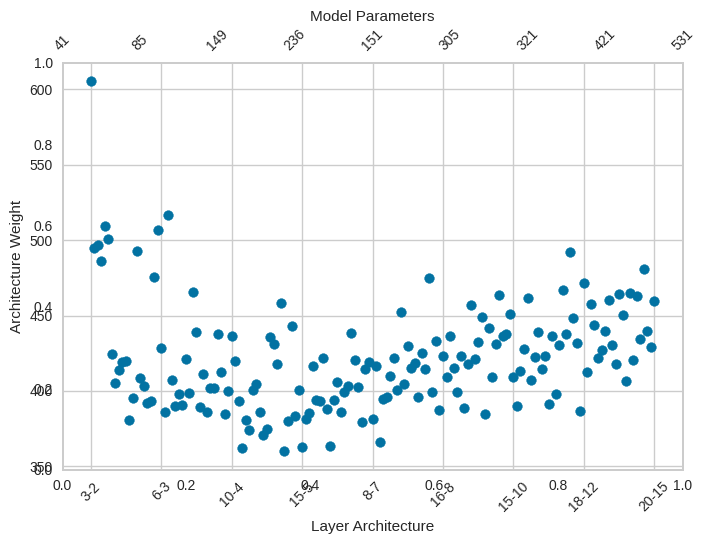

In [118]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111)
ax.grid(True)
ax.scatter(
    data['layer architecture'],
    (data['architecture weight'])
)
# plt.grid(False)
# plt.xlabel('layer architecture')
# plt.ylabel('architecture weight')
ax_upper = ax.twiny() 
ax_upper.set_xticks(ax.get_xticks(), rotation = 45, 
                    labels = data['trained parameters'].iloc[ticks]
)
# ax.grid(False)
ax_upper.grid(False)
ax_upper.set_xlabel('Model Parameters')
ax.set_xlabel('Layer Architecture')
ax.set_ylabel('Architecture Weight')
fig.subplots_adjust(top=0.85)


0
20
40
60
80
100
120
140
160


Text(0.5, 0.999, 'Architecture Weights as a Function of Model Complexity')

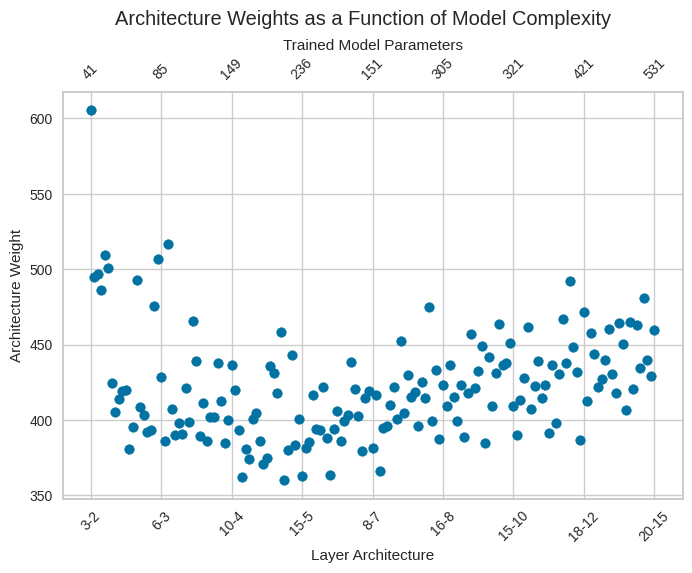

In [139]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax1 = fig.add_subplot(111)
ax.scatter(
    data['layer architecture'],
    (data['architecture weight'])
)


ticks = []
for i in range(0,161,20):
    print(i)
    ticks.append(i)
ax.set_xticks(ticks, rotation = 45, labels = data['layer architecture'].iloc[ticks])

ax.grid(True)
ax.set_xlabel('Layer Architecture')
ax2 = ax.twiny()
ax2.set_xticks( ax.get_xticks() )
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(ax.get_xticks(), rotation = 45, 
                    labels = data['trained parameters'].iloc[ticks]
)
ax2.grid(False)
ax2.set_xlabel('Trained Model Parameters')
ax.set_ylabel('Architecture Weight')
# title = ax1.set_title("Upper x-axis ticks are lower x-axis ticks doubled!")
# title.set_y(1.1)
fig.subplots_adjust(top=0.85)
fig.suptitle('Architecture Weights as a Function of Model Complexity',y = 0.999)

In [30]:
rootdir = 'zults/'
predictions = pd.DataFrame()
statistics = pd.DataFrame()
file_reader = pd.read_pickle(rootdir + 'model_statistics_' + parameterization + '.pkl')
statistics = pd.concat([statistics, file_reader], ignore_index = True)

# statistics = statistics.drop('Unnamed: 0', axis = 1)
statistics['total parameters'] = statistics['total parameters'].astype(int)
statistics['trained parameters'] = statistics['trained parameters'].astype(int)
statistics['total inputs'] = statistics['total inputs'].astype(int)
statistics['test - train'] = (
    abs(statistics['test mae avg'] - statistics['train mae avg']))
statistics['paramater ratio'] = statistics['trained parameters'] / statistics['total inputs']
statistics

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,3-2,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,4-2,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,5-2,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,6-2,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,7-2,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...
156,16-15,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,17-15,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,18-15,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,19-15,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


In [39]:
statistics[statistics['test mae avg'] == statistics['test mae avg'].min()]

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
143,14-13,368,349,3069,15.481843,15.948079,3.119413,0.878292,167.665106,0.005964,0.466236,0.113718


In [70]:
data = pd.merge(aw, statistics, how = 'inner', on = 'layer architecture')
data

,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,605.434255,3-2,15.015345,16.192550,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,494.982598,4-2,13.553557,14.055367,13.283709,481.429041,363.432996,1194.785668,18.000000,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,496.478870,5-2,14.982456,15.443266,13.971775,481.496413,402.058093,982.332871,17.333333,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,485.835202,6-2,14.312839,14.339661,13.826307,471.522363,393.729583,997.012712,16.666667,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,509.612190,7-2,15.021697,15.731676,13.688463,494.590493,385.917971,1129.789841,18.000000,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,434.709748,16-15,15.706934,15.230605,14.537448,419.002813,435.273263,796.516220,15.333333,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,480.753161,17-15,15.409427,15.130714,14.484626,465.343734,432.115884,815.693505,16.000000,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,439.760362,18-15,14.629165,13.923596,14.367085,425.131198,425.131198,801.549450,15.333333,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,428.931975,19-15,15.047602,14.309415,14.448382,413.884372,429.956066,787.929377,14.666667,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


In [67]:
# data = pd.merge(data, est, how = 'inner', on = 'layer architecture')

In [71]:
data

,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,605.434255,3-2,15.015345,16.192550,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,494.982598,4-2,13.553557,14.055367,13.283709,481.429041,363.432996,1194.785668,18.000000,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,496.478870,5-2,14.982456,15.443266,13.971775,481.496413,402.058093,982.332871,17.333333,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,485.835202,6-2,14.312839,14.339661,13.826307,471.522363,393.729583,997.012712,16.666667,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,509.612190,7-2,15.021697,15.731676,13.688463,494.590493,385.917971,1129.789841,18.000000,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,434.709748,16-15,15.706934,15.230605,14.537448,419.002813,435.273263,796.516220,15.333333,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,480.753161,17-15,15.409427,15.130714,14.484626,465.343734,432.115884,815.693505,16.000000,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,439.760362,18-15,14.629165,13.923596,14.367085,425.131198,425.131198,801.549450,15.333333,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,428.931975,19-15,15.047602,14.309415,14.448382,413.884372,429.956066,787.929377,14.666667,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


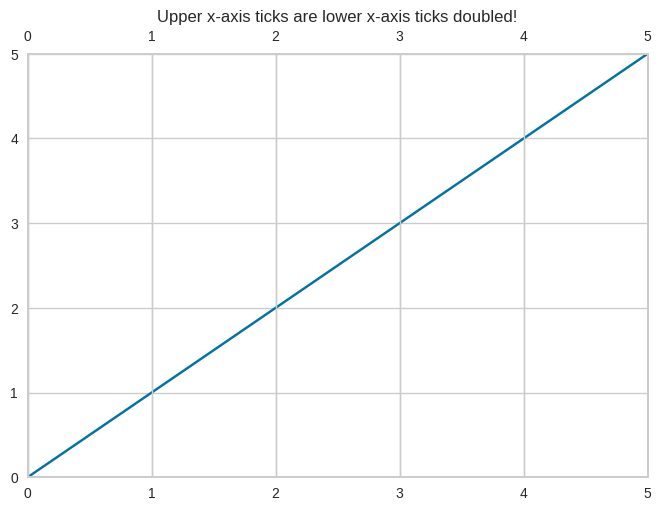

In [50]:
fig, ax1 = plt.subplots()

# ax1 = fig.add_subplot(111)

ax1.plot(
    (0,5),(0,5)
)
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
# ax1.grid(True)

ax2 = ax1.twiny()
ax2.set_xticks( ax1.get_xticks() )
# ax2.set_xbound(ax1.get_xbound())
# ax2.set_xticklabels([x * 2 for x in ax1.get_xticks()])

title = ax1.set_title("Upper x-axis ticks are lower x-axis ticks doubled!")
# title.set_y(1.1)
# fig.subplots_adjust(top=0.85)

In [69]:
data

,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,pr_9,pr_10,pr_11,pr_12,pr_13,pr_14,pr_15,pr_16,pr_17,pr_18,pr_19,pr_20,pr_21,pr_22,pr_23,pr_24,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,r_11,r_12,r_13,r_14,r_15,r_16,r_17,r_18,r_19,r_20,r_21,r_22,r_23,r_24
0,605.434255,3-2,15.015345,16.19255,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,283.0,224.0,160.0,89.0,230.0,49.0,230.0,288.0,223.0,270.0,49.0,244.0,49.0,222.0,96.0,48.0,235.0,204.0,49.0,274.0,285.0,210.0,267.0,196.0,236.0,0.20,-0.05,-0.32,-0.62,-0.02,-0.79,-0.02,0.23,-0.05,0.15,-0.79,0.04,-0.79,-0.06,-0.59,-0.80,0.00,-0.13,-0.79,0.17,0.21,-0.11,0.14,-0.17,0.00,48.0,-11.0,-75.0,-146.0,-5.0,-186.0,-5.0,53.0,-12.0,35.0,-186.0,9.0,-186.0,-13.0,-139.0,-187.0,0.0,-31.0,-186.0,39.0,50.0,-25.0,32.0,-39.0,1.0
1,605.434255,3-2,15.015345,16.19255,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359,RGI60-01.00570,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,147.0,127.0,87.0,76.0,46.0,113.0,49.0,110.0,137.0,91.0,117.0,49.0,87.0,49.0,77.0,36.0,49.0,108.0,106.0,49.0,129.0,126.0,94.0,98.0,74.0,101.0,-0.14,-0.41,-0.48,-0.69,-0.23,-0.67,-0.25,-0.07,-0.38,-0.20,-0.67,-0.41,-0.67,-0.48,-0.76,-0.67,-0.27,-0.28,-0.67,-0.12,-0.14,-0.36,-0.33,-0.50,-0.31,-20.0,-60.0,-71.0,-101.0,-34.0,-98.0,-37.0,-10.0,-56.0,-30.0,-98.0,-60.0,-98.0,-70.0,-111.0,-98.0,-39.0,-41.0,-98.0,-18.0,-21.0,-53.0,-49.0,-73.0,-46.0
2,605.434255,3-2,15.015345,16.19255,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359,RGI60-01.01104,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,66.0,120.0,82.0,69.0,46.0,110.0,49.0,106.0,125.0,86.0,121.0,49.0,81.0,49.0,70.0,37.0,49.0,101.0,98.0,49.0,123.0,118.0,90.0,93.0,70.0,101.0,0.82,0.24,0.05,-0.30,0.67,-0.26,0.61,0.89,0.30,0.83,-0.26,0.23,-0.26,0.06,-0.44,-0.26,0.53,0.48,-0.26,0.86,0.79,0.36,0.41,0.06,0.53,54.0,16.0,3.0,-20.0,44.0,-17.0,40.0,59.0,20.0,55.0,-17.0,15.0,-17.0,4.0,-29.0,-17.0,35.0,32.0,-17.0,57.0,52.0,24.0,27.0,4.0,35.0
3,605.434255,3-2,15.015345,16.19255,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359,RGI60-01.16374,61.200000,-140.302000,14.0,2145,2509,2894,5.859,341,3374,66.0,91.0,59.0,66.0,41.0,77.0,49.0,94.0,92.0,69.0,84.0,49.0,53.0,49.0,45.0,43.0,49.0,72.0,70.0,49.0,93.0,88.0,68.0,66.0,50.0,66.0,0.38,-0.11,0.00,-0.38,0.17,-0.26,0.42,0.39,0.05,0.27,-0.26,-0.20,-0.26,-0.32,-0.35,-0.26,0.09,0.06,-0.26,0.41,0.33,0.03,0.00,-0.24,0.00,25.0,-7.0,0.0,-25.0,11.0,-17.0,28.0,26.0,3.0,18.0,-17.0,-13.0,-17.0,-21.0,-23.0,-17.0,6.0,4.0,-17.0,27.0,22.0,2.0,0.0,-16.0,0.0
4,605.434255,3-2,15.015345,16.19255,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359,RGI60-02.03411,51.177000,-116.330000,15.3,2390,2526,2853,0.872,69,1181,70.0,82.0,53.0,58.0,30.0,67.0,49.0,78.0,88.0,57.0,62.0,49.0,43.0,49.0,43.0,32.0,49.0,63.0,54.0,49.0,78.0,78.0,55.0,52.0,48.0,57.0,0.17,-0.24,-0.17,-0.57,-0.04,-0.30,0.11,0.26,-0.19,-0.11,-0.30,-0.39,-0.30,-0.39,-0.54,-0.30,-0.10,-0.23,-0.30,0.11,0.11,-0.21,-0.26,-0.31,-0.19,12.0,-17.0,-12.0,-40.0,-3.0,-21.0,8.0,18.0,-13.0,-8.0,-21.0,-27.0,-21.0,-27.0,-38.0,-21.0,-7.0,-16.0,-21.0,8.0,8.0,-15.0,-18.0,-22.0,-13.0
...,...

In [57]:
data

,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,605.434255,3-2,15.015345,16.192550,13.805426,590.418910,392.541235,1113.689045,19.333333,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,494.982598,4-2,13.553557,14.055367,13.283709,481.429041,363.432996,1194.785668,18.000000,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,496.478870,5-2,14.982456,15.443266,13.971775,481.496413,402.058093,982.332871,17.333333,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,485.835202,6-2,14.312839,14.339661,13.826307,471.522363,393.729583,997.012712,16.666667,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,509.612190,7-2,15.021697,15.731676,13.688463,494.590493,385.917971,1129.789841,18.000000,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,434.709748,16-15,15.706934,15.230605,14.537448,419.002813,435.273263,796.516220,15.333333,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,480.753161,17-15,15.409427,15.130714,14.484626,465.343734,432.115884,815.693505,16.000000,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,439.760362,18-15,14.629165,13.923596,14.367085,425.131198,425.131198,801.549450,15.333333,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,428.931975,19-15,15.047602,14.309415,14.448382,413.884372,429.956066,787.929377,14.666667,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


In [38]:
data[(data['architecture weight'] == data['architecture weight'].min())]

,architecture weight,layer architecture,bias1,bias2,bias3,var_1,var_2,simple var,simple sig,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
55,360.064525,10-5,10.759741,10.281909,13.804329,349.304784,392.478855,793.825404,14.666667,180,161,3069,15.92112,15.981354,3.152902,0.824784,163.039082,0.006133,0.060234,0.05246


In [ ]:
plt.scatter(
    aw.index,
    (aw['simple sig'])**2
)

In [ ]:
for i in range(1,4,1):
    plt.scatter(
        aw.index,
        aw['bias'+str(i)], 
        label = 'Interpretation '+str(i)
    )
plt.ylabel('Model Bias')
plt.xlabel('Architecture Index')
plt.legend()

In [ ]:
plt.scatter(
    aw.index,
    aw['var_1'],
    label = 'Model Pool Deviation IQR'
)
plt.scatter(
    aw.index,
    aw['var_2'],
    label = 'Total Pool Deviation IQR'
)
plt.legend()
plt.show()

In [ ]:
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 1'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 2'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 3'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 4'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 5'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 6'
)
plt.legend()
plt.show()

In [ ]:
1 / sum(1/architecture_weights['architecture weight'])

In [ ]:
plt.scatter(architecture_weights.index, architecture_weights['architecture weight'])

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'][::-1] )/ sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')
# string = '$w_{i} = \frac{1}{N_{g}N_{x}} \sum_{j}^{N_g} \sum_{k}^{N_x} \left(R_{ijk} - M_{i}\right)^2$'
plt.suptitle('Simple Residual Variance Weights $ w_i = {}^{R}_{}\sigma^{2}_{i}$', y = 0.92)

In [ ]:
plt.plot(
    1/np.cumsum(1/aw['architecture weight'])
)

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'][::-1]) / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'])[::-1] / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)


In [ ]:
print('Compiling predictions...')
arch_list = architecture_weights['layer architecture']
df = pd.DataFrame(columns = [
        'RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
])
for arch in tqdm(arch_list):
    df_glob = gl.load_global_predictions(
        parameterization = parameterization,
        architecture = arch
    )

    df = pd.concat([df,df_glob])
#     break
statistics = pd.DataFrame()
for file in (os.listdir('zults/')):
    if 'statistics_' + parameterization in file:
        file_reader = pd.read_pickle('zults/' + file)
        statistics = pd.concat([statistics, file_reader], ignore_index = True)

# df = pd.merge(df, statistics, on = 'layer architecture')
df = df[[
        'layer architecture','RGIId','0', '1', '2', '3', '4',
        '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

In [ ]:
df

In [ ]:
df = pd.read_hdf(
    'predicted_thicknesses/compiled_raw_4.h5', key = 'compiled_raw', mode = 'a'
)

In [ ]:
compiled_raw = df.groupby('RGIId')[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

In [ ]:
compiled_raw

In [ ]:
def GB_D_common_estimator(n, S, X):
    mu = sum((n / S)*X) / sum(n / S)
    
    return mu

def unbiased_variance_estimator(n_m, n_x, sigma_m, sigma_x):
    
    q_1 = 4 / (n_m - 1)
    q_2 = (n_m / sigma_m) / sum(n_x/sigma_x)
    q_3 = (n_m / sigma_m**2) / sum(n_x/sigma_x)**2
    q_4 = sum(n_m / sigma_m)
    
    var = (
        (1 + sum(q_1 * (q_2 - q_3))) / q_4
    )
    return var

In [ ]:
dft = pd.DataFrame()
for this_rgi_id, obj in tqdm(compiled_raw):
#     print(obj['layer architecture'])
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
    print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = obj[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     arch_weight = obj[['architecture weight']]
    
#     aw = arch_weight.values.flatten()

    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     arch_weight = obj[['architecture weight']]
#     aw = arch_weight.values.flatten()
#     pr = np.array(predictions.values)

    
#     print(pr)
#     weighted_mean = 0
#     for p, w in zip(pr, aw):
#         weighted_mean = weighted_mean + np.nanmean(p/w)
#     weighted_mean = weighted_mean / sum(1/aw)
    
    
#     dft.loc[dft.index[-1], 'Weighted Mean Thickness'] = weighted_mean
    
    
    
    
#     print(
#             pr[:][1:5]
#     )
#     print(
#         np.mean(
#             pr[:][0:160]
#         )
#     )
#     print(
#             np.var(pr[:][0:160])
#     )
#     print(
#             np.sqrt(
#                 np.var(pr[:][0:160])
#             )
#     )    
    
    
    
    
    break
predictions

In [ ]:
est

In [ ]:
dft = pd.DataFrame()
for this_rgi_id in tqdm(est['RGIId'].unique()):
    dfr = est[est['RGIId'] == this_rgi_id]
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
#     print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = dfr[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     architecture_weights = pd.read_csv('architecture_weights.csv')
#     architecture_weights = architecture_weights.drop('Unnamed: 0', axis = 1)
    
    obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     print(obj)
    arch_weight = obj[['architecture weight']]
    
    aw = arch_weight.values.flatten()

#     print(arch_weight)
    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     std = 
    
    pr = np.array(predictions.values)
    variance = pr.var()
    weighted_mean = 0
    for p, w in zip(pr, aw):
        weighted_mean = weighted_mean + (p/w)
    weighted_mean = weighted_mean.mean().mean() / sum(1/aw)
#     print(weighted_mean)
    residual = (weighted_mean - dfr['Thickness'].mean())
#     print('plain mean = ' + str(predictions.mean().mean()))
#     print('weighted mean = ' + str(
#         np.nansum(
#             predictions.div(
#             arch_weight.values).values) / np.nansum(1/arch_weight.values)
#         weighted_mean
#     ) 
#     )

#     var = sd**2
#     print(pr.flatten().var())
#     print(pr.var())
    var = pr.var(axis = 1)
    var = predictions.values
    dft.loc[dft.index[-1], 'Weighted Mean Thickness'] = weighted_mean
    dft.loc[dft.index[-1], 'Model Variance'] = variance
    dft.loc[dft.index[-1], 'Residual'] = residual
    dft.loc[dft.index[-1], 'Thickness'] = dfr['Thickness'].mean()
    dft.loc[dft.index[-1], 'Area'] = dfr['Area'].mean()
               
#     break
dft